In [1]:
%matplotlib inline
import numpy as np
import matplotlib
#matplotlib.rcParams['figure.figsize'] = (60.0, 60.0)
import matplotlib.pyplot as plt
import sem
import scipy.linalg as la
from math import *

In [2]:
def mesh(alpha, N):
    return .5*np.sin(np.linspace(-pi/2+alpha,pi/2-alpha,N))/abs(sin((pi/2-alpha)))

In [3]:
def wall_units(yl, Nz, p, Re, plot=False):
    lstar=1/Re;
    As, Bs, Cs, Ds, z, w = sem.semhat(p)
    y_gll = np.zeros(0)
    for i in range(len(yl)-1):
        y_gll = np.append(y_gll, yl[i]+ (z+1.)/2. * (yl[i+1]-yl[i]))
    ym_vec = (y_gll[1:] - y_gll[:-1]) / lstar
    y_p = (y_gll-y_gll[0])/lstar
    ym = np.max(ym_vec)
    y1 = y_p[3]
    y10=np.max(ym_vec[1:2*p+3])
    y10=np.max(ym_vec[1:11])
    y10 = y_p[9]
    if plot:
        plt.plot(yl,np.ones(yl.size))
        plt.plot(y_gll,np.ones(y_gll.size))
    
    z_gll = np.zeros(0)
    zg = np.linspace(0,24,Nz)
    for i in range(len(zg)-1):
        z_gll = np.append(z_gll, zg[i]+ (z+1.)/2. * (zg[i+1]-zg[i]))
    zn = np.max(z_gll[1:]-z_gll[:-1])/lstar
    return ym, y1, y10, zn

def plot_units(yms, y1s, y10s, zms, line=None):
    plt.plot(alphs,yms, label='max[Delta y]')
    plt.plot(alphs,y1s, label='y(4)')
    plt.plot(alphs,y10s, label='y(10)')
    plt.plot(alphs,zms, label = 'max[Delta z]')
    plt.axhline(1.0, color='green')
    plt.axhline(6.0, color='red')
    plt.axhline(5.0, color='blue')
    if line is not None:
        plt.axvline(line, color='black')
    plt.grid()
    plt.legend()
    plt.xlabel('alpha')
    plt.ylabel('Wall units')

Find the best $\alpha$ for $p = 31, N_y = 64, N_z = 512$

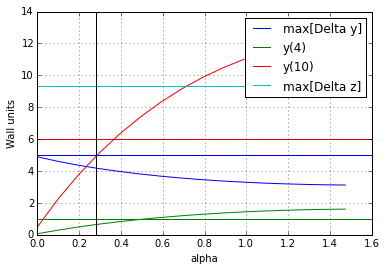

In [4]:
alphs = list(np.linspace(0,pi/2, 16, endpoint=False))
Re=4000;
N = 31
Nl = 65
Nz = 513
yms = []; y1s = []; y10s = []; zms = []
for alph in alphs:
    yl=mesh(alph, Nl)
    ym, y1, y10, zm = wall_units(yl,Nz,N,Re)
    yms.append(ym)
    y1s.append(y1)
    y10s.append(y10)
    zms.append(zm)

plot_units(yms, y1s, y10s, zms, .28)

Find the best $\alpha$ for $p = 7, N_y = 256, N_z = 2048$

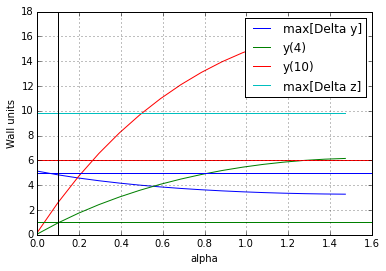

In [5]:
alphs = list(np.linspace(0,pi/2, 16, endpoint=False))
Re=4000;
N = 7
Nl = 257
Nz = 2049
yms = []; y1s = []; y10s = []; zms = []
for alph in alphs:
    yl=mesh(alph, Nl)
    ym, y1, y10, zm = wall_units(yl,Nz, N,Re)
    yms.append(ym)
    y1s.append(y1)
    y10s.append(y10)
    zms.append(zm)

plot_units(yms, y1s, y10s, zms, .1)

Print out the corner positions for $p = 31$

In [6]:
yl=mesh(.28, 65)
print(yl)

[-0.5        -0.49379526 -0.48678717 -0.47898713 -0.47040784 -0.46106324
 -0.45096855 -0.44014019 -0.42859577 -0.41635408 -0.40343502 -0.38985962
 -0.37564997 -0.36082918 -0.34542136 -0.32945158 -0.31294582 -0.29593093
 -0.2784346  -0.26048529 -0.2421122  -0.22334522 -0.20421488 -0.18475231
 -0.16498917 -0.14495761 -0.12469022 -0.10421997 -0.08358018 -0.0628044
 -0.04192645 -0.02098029  0.          0.02098029  0.04192645  0.0628044
  0.08358018  0.10421997  0.12469022  0.14495761  0.16498917  0.18475231
  0.20421488  0.22334522  0.2421122   0.26048529  0.2784346   0.29593093
  0.31294582  0.32945158  0.34542136  0.36082918  0.37564997  0.38985962
  0.40343502  0.41635408  0.42859577  0.44014019  0.45096855  0.46106324
  0.47040784  0.47898713  0.48678717  0.49379526  0.5       ]


Print out the corner positions for $p = 7$

In [7]:
yl=mesh(.1, 257)
print(yl)

[-0.5        -0.49939055 -0.49871517 -0.49797394 -0.49716696 -0.49629434
 -0.49535619 -0.49435264 -0.49328382 -0.49214987 -0.49095094 -0.48968718
 -0.48835878 -0.48696589 -0.48550871 -0.48398743 -0.48240224 -0.48075336
 -0.47904101 -0.47726541 -0.47542679 -0.4735254  -0.47156149 -0.46953532
 -0.46744716 -0.46529727 -0.46308596 -0.4608135  -0.4584802  -0.45608636
 -0.45363231 -0.45111836 -0.44854485 -0.44591211 -0.44322051 -0.44047038
 -0.4376621  -0.43479603 -0.43187255 -0.42889205 -0.42585493 -0.42276158
 -0.41961241 -0.41640784 -0.41314828 -0.40983418 -0.40646597 -0.40304409
 -0.399569   -0.39604115 -0.39246101 -0.38882905 -0.38514576 -0.38141161
 -0.37762711 -0.37379274 -0.36990903 -0.36597647 -0.36199559 -0.35796692
 -0.35389098 -0.34976832 -0.34559948 -0.34138501 -0.33712546 -0.3328214
 -0.3284734  -0.32408203 -0.31964787 -0.31517151 -0.31065353 -0.30609454
 -0.30149513 -0.29685592 -0.29217751 -0.28746053 -0.28270559 -0.27791332
 -0.27308436 -0.26821935 -0.26331892 -0.25838372 -0.